### Backtrader Learning

In [1]:
# Importa características de compatibilidad del futuro para asegurar
# que el código se ejecute correctamente en versiones antiguas de Python
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

# Importa la librería Backtrader, utilizada para el backtesting de estrategias de trading
import backtrader as bt 
import datetime # Para objetos de tiempo
import os # para manejar rutas del sistema operativo
# Importa la función `download_data` desde el módulo `get_fmp_financial_data` del paquete `backtesting`
from backtesting.get_fmp_financial_data import download_data
# Importa la función `run_backtest` desde el módulo `run_cerebro` del paquete `backtesting`
from backtesting.run_cerebro import run_backtest 

download_data_flag = True #Colocar en True para descargar datos.

In [3]:
if download_data_flag:
    # Documentación oficial de la API de Financial Modeling Prep
    # Puedes consultar todos los endpoints y parámetros disponibles en:
    # https://site.financialmodelingprep.com/developer/docs/dashboard

    # Clave de acceso a la API de Financial Modeling Prep
    # Reemplaza este valor por tu propia API Key para evitar límites o restricciones
    API_KEY = 'KHaX7pC1mrq6xbHFHLY60qgDmORDUDFb'

    # Ruta donde se guardarán los datos descargados
    # Aquí se indica un directorio relativo a la ubicación del script
    OUTPUT_PATH = '../Data'

    # Llama a la función `download_data` para descargar datos históricos
    # Parámetros:
    #   1. API_KEY: Clave de acceso a la API
    #   2. "2025-01-01": Fecha de inicio del rango de datos
    #   3. "2025-08-08": Fecha de fin del rango de datos
    #   4. "5min": Intervalo de tiempo de las velas (5 minutos)
    #   5. "EURUSD": Símbolo del activo (par de divisas Euro/Dólar estadounidense)
    #   6. OUTPUT_PATH: Carpeta donde se guardará el archivo con los datos descargados
    download_data(API_KEY, "2025-01-01", "2025-08-14", "5min", "EURUSD", OUTPUT_PATH)

File saved: ../Data/EURUSD_5min_20250101_20250814.csv
Total records: 2219
File saved: ../Data/EURUSD_5min_20250101_20250814.csv
Total records: 2219


### TestStrategy Example #1

#### 📌 Estrategia `TestStrategy1` – Imprimir el valor máximo por día  

#### 🎯 Objetivo  
Procesar datos intradía (por ejemplo, velas de **5 minutos**) y calcular **el precio máximo alcanzado en cada jornada de trading**.  
Al final de cada día, imprimir dicho valor en consola.  

#### 🔹 Flujo de funcionamiento  

1. **Inicialización (`__init__`)**  
   - `self.daily_high` → Guarda el precio máximo encontrado en el día actual.  
   - `self.current_day` → Registra qué día se está procesando para detectar cambios de jornada.  

2. **Ejecución por cada barra (`next()`)**  
   - Obtiene la fecha de la barra actual (`bar_date`).  
   - Si el día ha cambiado:  
     - Si ya se procesó un día anterior, imprime el **máximo diario** encontrado.  
     - Reinicia `self.daily_high` con el precio alto de la nueva barra.  
     - Actualiza `self.current_day` al nuevo día.  
   - Si sigue siendo el mismo día:  
     - Compara el precio alto de la barra actual con `self.daily_high`.  
     - Si es mayor, lo actualiza con el nuevo valor.  

3. **Finalización (`stop()`)**  
   - Al terminar el backtest, imprime el **máximo del último día** procesado.  

#### 📊 Ejemplo de salida en consola  
```
2025-01-01, Max diario: 1.0934
2025-01-02, Max diario: 1.0951
2025-01-03, Max diario: 1.0910
```  

#### 📌 Casos de uso  
- Análisis de volatilidad diaria.  
- Generación de señales basadas en rupturas de máximos.  
- Backtesting de estrategias de breakout.  

In [ ]:
# Estrategia personalizada para imprimir el valor máximo por día
class TestStrategy1(bt.Strategy):

    def log(self, txt, dt=None):
        '''Función para imprimir mensajes con fecha'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Variable para almacenar el máximo del día actual
        self.daily_high = None
        # Variable para almacenar el día actual
        self.current_day = None

    def next(self):
        # Obtiene la fecha de la barra actual
        bar_date = self.datas[0].datetime.date(0)

        # Si es un nuevo día, reinicia el máximo diario
        if bar_date != self.current_day:
            # Si ya teníamos un día anterior registrado, imprime el máximo de ese día
            if self.current_day is not None:
                self.log('Max diario: %.2f' % self.daily_high)

            # Actualiza el día actual y reinicia el máximo
            self.current_day = bar_date
            self.daily_high = self.datas[0].high[0]
        else:
            # Si es el mismo día, actualiza el máximo si es necesario
            if self.datas[0].high[0] > self.daily_high:
                self.daily_high = self.datas[0].high[0]

    def stop(self):
        # Al finalizar, imprime el máximo del último día
        if self.current_day is not None:
            self.log('Max diario: %.2f' % self.daily_high)

In [ ]:
if __name__ == '__main__':
    run_backtest(
        strategy=TestStrategy1,
        cash=100000.0,
        datapath=os.path.join('../Data/EURUSD_5min_20250101_20250808.csv'),
        from_date=datetime.datetime(2025, 1, 1),
        to_date=datetime.datetime(2025, 8, 8)
    )

Data Path: ../Data/EURUSD_5min_20250101_20250808.csv
Starting Portfolio Value: 100000.00
2025-07-30, Max diario: 1.16
2025-07-31, Max diario: 1.16
2025-08-01, Max diario: 1.15
2025-08-03, Max diario: 1.16
2025-08-04, Max diario: 1.16
2025-08-05, Max diario: 1.16
2025-08-06, Max diario: 1.16
2025-08-07, Max diario: 1.17
2025-08-07, Max diario: 1.17
Final Portfolio Value: 100000.00
2025-07-31, Max diario: 1.16
2025-08-01, Max diario: 1.15
2025-08-03, Max diario: 1.16
2025-08-04, Max diario: 1.16
2025-08-05, Max diario: 1.16
2025-08-06, Max diario: 1.16
2025-08-07, Max diario: 1.17
2025-08-07, Max diario: 1.17
Final Portfolio Value: 100000.00


#### TestStrategy Example #2

#### 📌 Estrategia `TestStrategy2` – Comprar tras 3 días consecutivos a la baja

#### 🎯 Objetivo  
Detectar secuencias de tres días consecutivos con cierres a la baja y ejecutar una orden de compra cuando esto ocurra. Imprimir el precio de cierre diario en consola para seguimiento.

#### 🔹 Flujo de funcionamiento  

1. **Inicialización (`__init__`)**  
   - `self.daily_close` → Guarda el precio de cierre del día en curso.  
   - `self.current_day` → Registra el día que se está procesando para detectar cambios de jornada.  
   - `self.daily_closes` → Lista que almacena los cierres diarios para analizar tendencias.

2. **Ejecución por cada barra (`next()`)**  
   - Obtiene la fecha de la barra actual (`bar_date`).  
   - Si el día ha cambiado:  
     - Si ya se procesó un día anterior, guarda el cierre en la lista y lo imprime en consola.  
     - Si hay al menos 3 cierres registrados, revisa si los últimos 3 son bajistas.  
     - Si se cumple la condición, imprime mensaje y ejecuta orden de compra.  
     - Actualiza `self.current_day` al nuevo día.  
   - Guarda el precio de cierre de la barra actual.

3. **Finalización (`stop()`)**  
   - Al terminar el backtest, guarda e imprime el cierre del último día.  
   - Realiza una última comprobación: si los últimos 3 cierres fueron bajistas, ejecuta una compra.

In [ ]:
# Estrategia para mostrar el precio de cierre diario y comprar si hay 3 días seguidos a la baja
class TestStrategy2(bt.Strategy):

    def log(self, txt, dt=None):
        """
        Función auxiliar para imprimir mensajes con fecha.
        
        Parámetros:
            txt (str): Mensaje a imprimir.
            dt (datetime.date, opcional): Fecha a mostrar en el log. 
                                           Si no se pasa, toma la fecha de la barra actual.
        """
        # Si no se pasa fecha, toma la fecha del primer conjunto de datos cargados
        dt = dt or self.datas[0].datetime.date(0)
        # Imprime la fecha en formato ISO y el mensaje
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Precio de cierre del último registro del día (se actualiza en cada barra)
        self.daily_close = None
        # Día que se está procesando actualmente (para detectar cambios de día)
        self.current_day = None
        # Lista que almacena los cierres diarios para analizar tendencias
        self.daily_closes = []

    def next(self):
        """
        Lógica que se ejecuta en cada nueva barra de datos (en este caso, cada 5 minutos).
        """
        # Obtiene la fecha de la barra actual
        bar_date = self.datas[0].datetime.date(0)

        # Si ha cambiado el día desde la última barra procesada
        if bar_date != self.current_day:
            # Si ya habíamos procesado un día anterior
            if self.current_day is not None:
                # Guarda el cierre del día anterior en la lista de cierres diarios
                self.daily_closes.append(self.daily_close)
                # Muestra el cierre del día anterior en el log
                self.log('Cierre diario: %.2f' % self.daily_close)

                # Si tenemos al menos 3 días registrados, revisa si son 3 días consecutivos bajando
                if len(self.daily_closes) >= 3:
                    if (self.daily_closes[-3] > self.daily_closes[-2] > self.daily_closes[-1]):
                        # Si se cumple la condición, imprime mensaje y ejecuta orden de compra
                        self.log("¡¡¡COMPRA COMPRA COMPRA!!! 🚀")
                        self.buy()

            # Actualiza el día actual al de la barra en curso
            self.current_day = bar_date

        # Guarda el precio de cierre de la barra actual (último precio de 5 minutos)
        self.daily_close = self.datas[0].close[0]

    def stop(self):
        """
        Lógica que se ejecuta al finalizar el backtest.
        """
        # Si hay un día en curso al terminar el backtest
        if self.current_day is not None:
            # Guarda el cierre del último día
            self.daily_closes.append(self.daily_close)
            # Muestra el cierre en el log
            self.log('Cierre diario: %.2f' % self.daily_close)

            # Última comprobación: si los últimos 3 cierres fueron bajistas, compra
            if len(self.daily_closes) >= 3:
                if (self.daily_closes[-3] > self.daily_closes[-2] > self.daily_closes[-1]):
                    self.log("¡¡¡COMPRA COMPRA COMPRA!!! 🚀")
                    self.buy()


# Ejecución del backtest
if __name__ == '__main__':
    run_backtest(
        strategy=TestStrategy2,  # Estrategia a ejecutar
        cash=100000.0,           # Capital inicial del broker
        datapath=os.path.join('../Data/EURUSD_5min_20250101_20250808.csv'),  # Ruta al CSV de datos históricos
        from_date=datetime.datetime(2025, 1, 1),  # Fecha de inicio del backtest
        to_date=datetime.datetime(2025, 8, 8)     # Fecha de fin del backtest
    )

Data Path: ../Data/EURUSD_5min_20250101_20250808.csv
Starting Portfolio Value: 100000.00
2025-07-30, Cierre diario: 1.16
2025-07-31, Cierre diario: 1.14
2025-08-01, Cierre diario: 1.14
2025-08-01, ¡¡¡COMPRA COMPRA COMPRA!!! 🚀
2025-08-03, Cierre diario: 1.16
2025-08-04, Cierre diario: 1.16
2025-08-05, Cierre diario: 1.16
2025-08-05, ¡¡¡COMPRA COMPRA COMPRA!!! 🚀
2025-08-06, Cierre diario: 1.16
2025-08-07, Cierre diario: 1.17
2025-08-07, Cierre diario: 1.17
Final Portfolio Value: 100000.01


#### TestStrategy Example #3

#### 📌 Descripción general
La estrategia **TestStrategy3** está implementada en **Backtrader** y tiene como objetivo demostrar:
- Cómo **escuchar notificaciones** de órdenes y operaciones.
- Cómo **evitar múltiples compras** si ya hay una posición abierta.
- Cómo **cerrar una posición después de 5 barras** (independiente del timeframe).
- Cómo **registrar el precio y momento de ejecución** de las órdenes.
- Opcionalmente, cómo **añadir indicadores técnicos** al gráfico según parámetros de configuración.

#### ⚙️ Parámetros configurables (`params`)
La estrategia permite activar o desactivar la visualización de indicadores técnicos mediante parámetros booleanos:

| Parámetro           | Tipo  | Descripción |
|--------------------|-------|-------------|
| `show_ema`         | bool  | Muestra **Media Móvil Exponencial** (EMA) de 25 periodos. |
| `show_wma`         | bool  | Muestra **Media Móvil Ponderada** (WMA) de 25 periodos en un subplot. |
| `show_stochastic`  | bool  | Muestra **Estocástico Lento**. |
| `show_macd`        | bool  | Muestra **MACD con histograma**. |
| `show_rsi`         | bool  | Muestra **Índice de Fuerza Relativa** (RSI). |
| `show_sma_rsi`     | bool  | Muestra **Media Móvil Suavizada** del RSI (requiere RSI). |
| `show_atr`         | bool  | Calcula **Rango Verdadero Medio** (ATR) pero no lo grafica. |

#### 🔍 Inicialización (`__init__`)
- Inicializa variables internas:
  - `self.order` → Almacena la orden activa para evitar duplicaciones.
  - `self.bar_executed` → Guarda el número de barra en el que se ejecutó una compra.
- Según los parámetros `params`, añade indicadores al gráfico para su análisis visual.

#### 📝 Registro de eventos (`log`)
- Imprime mensajes con la fecha de la barra y un texto personalizado.
- Utilizado para depurar y seguir la ejecución de la estrategia.

#### 📬 Notificación de órdenes (`notify_order`)
- Escucha los eventos de cambio de estado de las órdenes:
  - `Submitted` / `Accepted` → Orden enviada o aceptada.
  - `Completed` → Orden ejecutada (compra o venta).
  - `Canceled` / `Margin` / `Rejected` → Orden cancelada, rechazada o fallida por margen.
- En el caso de ejecución (`Completed`):
  - Registra **precio**, **coste** y **comisión**.
  - Guarda el índice de barra (`len(self)`) para calcular el tiempo de espera antes de vender.

#### 💹 Notificación de operaciones (`notify_trade`)
- Escucha el cierre de una operación.
- Registra **beneficio bruto** (`pnl`) y **beneficio neto** (`pnlcomm`).

#### 📈 Lógica de la estrategia (`next`)
- En cada barra:
  1. Registra el **precio de cierre**.
  2. Si ya hay una orden pendiente, no hace nada.
  3. Si **no hay posición abierta**:
     - Comprueba si el **cierre actual es menor que el anterior**, y el anterior menor que el de hace dos barras → Señal de **compra**.
  4. Si **hay posición abierta**:
     - Si han pasado **5 barras** desde la compra → Señal de **venta**.

#### 📂 Ejecución (`__main__`)
Se invoca la función `run_backtest` con:
- **Estrategia:** `TestStrategy3`
- **Capital inicial:** `100000.0`
- **Datos:** archivo `EURUSD_5min_20250101_20250808.csv`
- **Rango de fechas:** del `2025-08-01 08:00` al `2025-08-08 12:00`
- **Comisión:** `0.5%` por operación
- **Tamaño de posición (`stake`)**: `10`
- **Gráfico:** desactivado (`plot=False`) pero con opción `plot_engine='widget'` si se activa.

#### 📌 Resumen de comportamiento
- Estrategia de tipo **tendencia inversa** en 3 velas (compra tras 2 caídas consecutivas).
- Vende automáticamente tras **5 velas**.
- Controla visualización de indicadores mediante parámetros.
#### 📊 Ejemplo de salida en consola  
```
2025-01-01, Señal de COMPRA
2025-01-01, COMPRA ejecutada, Precio: 1.0934, Costo: 1.0934, Comisión: 0.00
2025-01-02, Señal de VENTA (5 barras después de la compra)
2025-01-02, VENTA ejecutada, Precio: 1.0951, Costo: 1.0951, Comisión: 0.00
2025-01-02, OPERACIÓN CERRADA, Ganancia Bruta: 0.0017, Ganancia Neta: 0.0017
```

#### 📌 Casos de uso  
- Ejemplo didáctico de control de órdenes y posiciones en Backtrader.  
- Estrategias de trading basadas en condiciones simples de entrada y salida.  
- Pruebas de lógica de ejecución y notificación de operaciones.

Data Path: ../Data/EURUSD_5min_20250101_20250808.csv
Starting Portfolio Value: 100000.00
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, BUY CREATE, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close, 1.14
2025-08-01, Close,

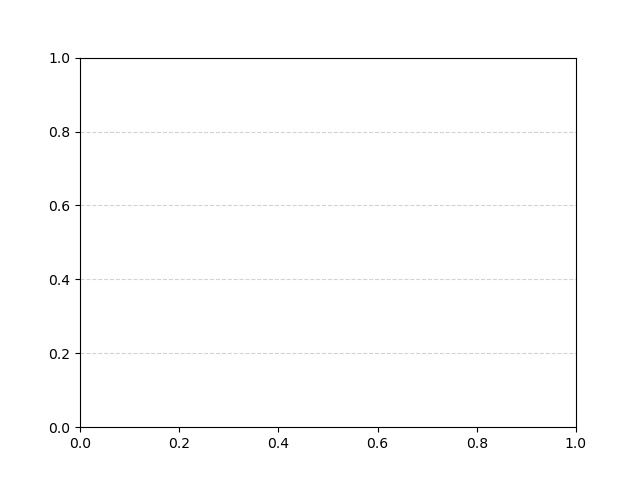

ValueError: not enough values to unpack (expected 2, got 1)

: 

In [ ]:
import matplotlib
matplotlib.use('inline')

class TestStrategy3(bt.Strategy):
    """
    Estrategia de ejemplo para Backtrader que demuestra:
    - Cómo escuchar notificaciones de órdenes y operaciones.
    - Cómo evitar múltiples compras si ya se tiene una posición abierta.
    - Cómo salir de la posición después de 5 barras (cualquier timeframe).
    - Cómo registrar el precio y momento de ejecución de las órdenes.

    Lógica:
    - Si no hay posición abierta y el cierre es mayor que la apertura, se genera una orden de compra.
    - Si hay posición abierta y han pasado 5 barras desde la compra, se genera una orden de venta.
    - Todas las órdenes y operaciones son notificadas y registradas en el log.
    
    El corredor dice: ¡Muéstrame el dinero!
    Y el dinero se llama “comisión”.
    
    Agreguemos una tasa de comisión razonable del 0,1% por operación (tanto de compra como de venta… sí, el broker es ávido…)
    
    Una sola línea será suficiente para ello:
    
    cerebro.broker.setcommission(commission=0.001)  # 0.1% ... divide by 100 para quitar el %
    """
    params = (
        ('show_ema', False),
        ('show_wma', False),
        ('show_stochastic', False),
        ('show_macd', False),
        ('show_rsi', False),
        ('show_sma_rsi', False),
        ('show_atr', False),
    )

    def __init__(self):
        self.order = None
        self.bar_executed = 0
        self.dataclose = self.datas[0].close            
        # Indicadores opcionales controlados por flags
        if self.params.show_ema:
            self.ema = bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        if self.params.show_wma:
            self.wma = bt.indicators.WeightedMovingAverage(self.datas[0], period=25, subplot=True)
        if self.params.show_stochastic:
            self.stochastic = bt.indicators.StochasticSlow(self.datas[0])
        if self.params.show_macd:
            self.macd = bt.indicators.MACDHisto(self.datas[0])
        if self.params.show_rsi:
            self.rsi = bt.indicators.RSI(self.datas[0])
        if self.params.show_sma_rsi:
            # Solo crea RSI si no existe
            if not hasattr(self, 'rsi'):
                self.rsi = bt.indicators.RSI(self.datas[0])
            self.sma_rsi = bt.indicators.SmoothedMovingAverage(self.rsi, period=10)
        if self.params.show_atr:
            self.atr = bt.indicators.ATR(self.datas[0], plot=False)

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def notify_order(self, order):
        """
        Método que Backtrader llama automáticamente para notificar cambios
        en el estado de una orden (compra o venta).

        Parámetros:
            order (bt.Order): Objeto que contiene toda la información de la orden.
        """

        # Si la orden acaba de ser enviada al bróker o aceptada,
        # no hacemos nada más y esperamos a que se complete o falle.
        if order.status in [order.Submitted, order.Accepted]:
            return

        # Si la orden fue completada (ejecutada en el mercado)
        if order.status in [order.Completed]:
            if order.isbuy():
                # Si es una compra, registramos precio, valor y comisión
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f'
                    % (order.executed.price, order.executed.value, order.executed.comm)
                )
                # Guardamos el número de barra en que se ejecutó la compra
                # para luego calcular cuándo vender (por ejemplo, después de X barras)
                self.bar_executed = len(self)

            elif order.issell():
                # Si es una venta, registramos precio, valor y comisión
                self.log(
                    'SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f'
                    % (order.executed.price, order.executed.value, order.executed.comm)
                )

            # En cualquier caso, ya no hay orden pendiente
            self.order = None

        # Si la orden fue cancelada, rechazada o no se pudo ejecutar por falta de margen
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            self.order = None

    def notify_trade(self, trade):
        """
        Método que Backtrader llama automáticamente para notificar
        el resultado de una operación (trade).

        Parámetros:
            trade (bt.Trade): Objeto que contiene la información de la operación,
                            incluyendo ganancias/pérdidas y comisiones.
        """

        # Si la operación aún está abierta (no se ha cerrado), no hacemos nada.
        if not trade.isclosed:
            return

        # Si la operación ya se cerró, mostramos en el log:
        # - Ganancia/pérdida bruta (sin descontar comisiones)
        # - Ganancia/pérdida neta (descontando comisiones)
        self.log(
            'OPERATION PROFIT, GROSS %.2f, NET %.2f'
            % (trade.pnl, trade.pnlcomm)
        )

    def next(self):
        """
        Método principal de la estrategia que Backtrader ejecuta en cada barra (candle).
        Contiene la lógica de entrada y salida de posiciones.

        Flujo:
            1. Registrar el precio de cierre actual.
            2. Verificar si hay una orden pendiente para evitar duplicados.
            3. Si no hay posición abierta, buscar oportunidad de compra.
            4. Si hay posición abierta, evaluar si es momento de vender.
        """

        # 1️⃣ Mostrar en el log el precio de cierre actual
        self.log('Close, %.2f' % self.dataclose[0])

        # 2️⃣ Si existe una orden pendiente, salir para evitar enviar otra
        if self.order:
            return

        # 3️⃣ Si NO estamos en el mercado (sin posición abierta)
        if not self.position:
            # Comprobar si el cierre actual es menor que el cierre previo
            if self.dataclose[0] < self.dataclose[-1]:
                # Comprobar si el cierre previo es menor que el cierre de hace dos barras
                if self.dataclose[-1] < self.dataclose[-2]:
                    # Señal de COMPRA: dos cierres consecutivos a la baja
                    self.log('BUY CREATE, %.2f' % self.dataclose[0])
                    # Guardar la orden para no generar otra mientras esté activa
                    self.order = self.buy()

        # 4️⃣ Si SÍ estamos en el mercado (posición abierta)
        else:
            # Comprobar si han pasado al menos 5 barras desde la compra
            if len(self) >= (self.bar_executed + 5):
                # Señal de VENTA: han pasado 5 barras desde la compra
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                # Guardar la orden para no generar otra mientras esté activa
                self.order = self.sell()

if __name__ == '__main__':
    run_backtest(
        strategy=TestStrategy3,  # Estrategia a ejecutar
        cash=100000.0,           # Capital inicial del broker
        datapath=os.path.join('../Data/EURUSD_5min_20250101_20250808.csv'),  # Ruta al CSV de datos históricos
        from_date=datetime.datetime(2025, 8, 1, 8, 0, 0),  # Fecha de inicio del backtest
        to_date=datetime.datetime(2025, 8, 8, 12, 0, 0),     # Fecha de fin del backtest
        commission=0.005,  # Comisión del 0.5% por operación (dividido por 100 para quitar el %
        stake=10,  # Tamaño de la posición
        plot=True,  # Habilita el gráfico de resultados
        plot_engine='widget',  # o 'widget'
        darkmode=False
    )